# 机器学习工程师纳米学位
## 强化学习
## 项目 4：训练智能出租车学会驾驶

欢迎来到机器学习工程师纳米学位的第四个项目！在这个 notebook 文件中，模板代码已经提供给你，有助于你对*智能出租车*的分析和实现学习算法。你无须改动已包含的代码，除非另有要求。 你需要回答 notebook 文件中给出的与项目或可视化相关的问题。每一个你要回答的问题前都会冠以**'问题 X'**。仔细阅读每个问题，并在后面**'回答'**文本框内给出完整的回答。你提交的项目会根据你对于每个问题的回答以及提交的 `agent.py` 的实现来进行评分。 

>**提示：**Code 和 Markdown 单元格可通过 **Shift + Enter** 快捷键来执行。此外，Markdown 可以通过双击进入编辑模式。

-----

## 开始
在这个项目中，你将构建一个优化的 Q-Learning 驾驶代理程序，它会操纵*智能出租车*通过它的周边环境到达目的地。因为人们期望*智能出租车*要将乘客从一个地方载到另一个地方，驾驶代理程序会以两个非常重要的指标来评价：**安全性**和**可靠性**。驾驶代理程序在红灯亮时仍然让*智能出租车*行驶往目的地或者勉强避开事故会被认为是**不安全**的。类似的，驾驶代理程序频繁地不能适时地到达目的地会被认为**不可靠**。最大化驾驶代理程序的**安全性**和**可靠性**保证了*智能出租车*会在交通行业获得长期的地位。

**安全性**和**可靠性**用字母等级来评估，如下：

| 等级 	| 安全性 	| 可靠性 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	| 代理程序没有任何妨害交通的行为，<br/>并且总是能选择正确的行动。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的 100%。 |
|   A   	| 代理程序有很少的轻微妨害交通的行为，<br/>如绿灯时未能移动。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的 90%。 |
|   B   	| 代理程序频繁地有轻微妨害交通行为，<br/>如绿灯时未能移动。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的 80%。 |
|   C   	| 代理程序有至少一次重大的妨害交通行为，<br/>如闯红灯。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的 70%。 |
|   D   	| 代理程序造成了至少一次轻微事故，<br/>如绿灯时在对面有车辆情况下左转。	| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的 60%。 |
|   F   	| 代理程序造成了至少一次重大事故，<br/>如有交叉车流时闯红灯。	| 代理程序在合理时间内到达目的地的次数<br />未能达到行驶次数的 60%。 |

为了协助评估这些重要的指标，你会需要加载可视化模块的代码，会在之后的项目中用到。运行下面的代码格来导入这个代码，你的分析中会需要它。

In [11]:
# 检查你的 Python 版本
from sys import version_info
if version_info.major != 2 and version_info.minor != 7:
    raise Exception('请使用 Python 2.7 来完成此项目')

In [12]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### 了解世界
在开始实现你的驾驶代理程序前，首先需要了解*智能出租车*和驾驶代理程序运行的这个世界（环境）。构建自我学习的代理程序重要的组成部分之一就是了解代理程序的特征，包括代理程序如何运作。原样直接运行 `agent.py` 代理程序的代码，不需要做任何额外的修改。让结果模拟运行一段时间，以观察各个不同的工作模块。注意在可视化模拟程序（如果启用了），**白色车辆**就是*智能出租车*。

### 问题 1
用几句话，描述在运行默认的 `agent.py` 代理程序中，你在模拟程序里观察到了什么。一些你可以考虑的情况：
- *在模拟过程中，智能出租车究竟移动了吗？*
- *驾驶代理程序获得了什么样的奖励？*
- *交通灯的颜色改变是如何影响奖励的？*

**提示：** 从顶层的 `/smartcab/` 目录（这个 notebook 所在的地方），运行命令
```bash
'python smartcab/agent.py'
```

**回答：**在初始模拟代码中，出租车没有移动（未采取任何动作）。

驾驶代理程序根据不同状况获得不同奖励：

1. 红灯时，代理程序因未采取动作获得正分奖励；
2. 绿灯且有来往车辆时，因未采取动作获得正分奖励；
3. 绿灯且没有来往车辆时，因未采取动作获得负分惩罚。

惩罚的分值远远大于奖励的分值。

不同交通灯的颜色，对代理程序采取行为有着不同预期：红灯要求驾驶代理程序停车（不采取动作），绿灯要求驾驶代理程序行驶（采取某一动作）。程序若采取了正确的动作，则获得正分奖励，否则会获得负分惩罚。

### 理解代码
除了要了解世界之外，还需要理解掌管世界、模拟程序等等如何运作的代码本身。如果一点也不去探索一下*“隐藏”*的器件，就试着去创建一个驾驶代理程序会很难。在顶层的 `/smartcab/ `的目录下，有两个文件夹：`/logs/`（之后会用到）和 `/smartcab/`。打开`/smartcab/`文件夹，探索每个下面的 Python 文件，然后回答下面的问题。

### 问题 2
- *在* `agent.py`* Python 文件里，选择 3 个可以设定的 flag，并描述他们如何改变模拟程序的。*
- *在* `environment.py`* Python 文件里，当代理程序执行一个行动时，调用哪个 Environment 类的函数？*
- *在* `simulator.py`* Python 文件里，*`'render_text()'` *函数和* `'render()'`* 函数之间的区别是什么?*
- *在* `planner.py`* Python 文件里，*`'next_waypoint()` *函数会先考虑南北方向还是东西方向?*

**回答：**

**agent.py**  
1. `verbose` - 设为 `True` 时模拟器会输出额外的信息用于 debug，默认为 `False`。
2. `num_dummies` - 设置虚拟环境中除要学习的智能出租车之外的其他车辆的数量，默认为 100。
3. `grid_size` - 设置虚拟环境中地图的大小。该值指定了地图行和列的交点（十字路口）个数，默认值为 `(8, 6)`。

**environment.py**

执行 `Environment.act()` 函数。

**simulator.py**

`render_text()` 函数是非 GUI 输出，用于显示文字；`render()` 函数是 GUI 输出，用于显示可视化模拟器。

**planner.py**

先考虑东西方向。

-----
## 实现一个基本的驾驶代理程序

创建一个优化 Q-Learning 的驾驶代理程序的第一步，是让代理程序确实地执行有效的行动。在这个情况下，一个有效的行动是 `None`（不做任何行动）、`'Left'`（左转）、`'Right'`（右转）或者 `'Forward'`（前进）。作为你的第一个实现，到 `'choose_action()'` 代理程序函数，使驾驶代理程序随机选择其中的一个动作。注意你会访问到几个类的成员变量，它们有助于你编写这个功能，比如 `'self.learning'` 和 `'self.valid_actions'`。实现后，运行几次代理程序文件和模拟程序来确认你的驾驶代理程序每步都执行随机的动作。

### 基本代理程序模拟结果
要从最初的模拟程序获得结果，你需要调整下面的标志：
- `'enforce_deadline'` - 将此标志设定为 `True` 来强制驾驶代理程序捕获它是否在合理时间内到达目的地。
- `'update_delay'` - 将此标志设定为较小数值（比如 `0.01`）来减少每次试验中每步之间的时间。
- `'log_metrics'` - 将此标志设定为 `True` 将模拟结果记录为在 `/logs/` 目录下的 `.csv` 文件。
- `'n_test'` - 将此标志设定为 `'10'` 则执行 10 次测试试验。

可选的，你还可以通过将 `'display'` 标志设定为 `False` 来禁用可视化模拟（可以使得试验跑得更快）。调试时，设定的标志会返回到他们的默认设定。重要的是要理解每个标志以及它们如何影响到模拟。

你成功完成了最初的模拟后（有 20 个训练试验和 10 个测试试验），运行下面的代码单元格来使结果可视化。注意运行同样的模拟时，日志文件会被覆写，所以留意被载入的日志文件！在 projects/smartcab 下运行 agent.py 文件。

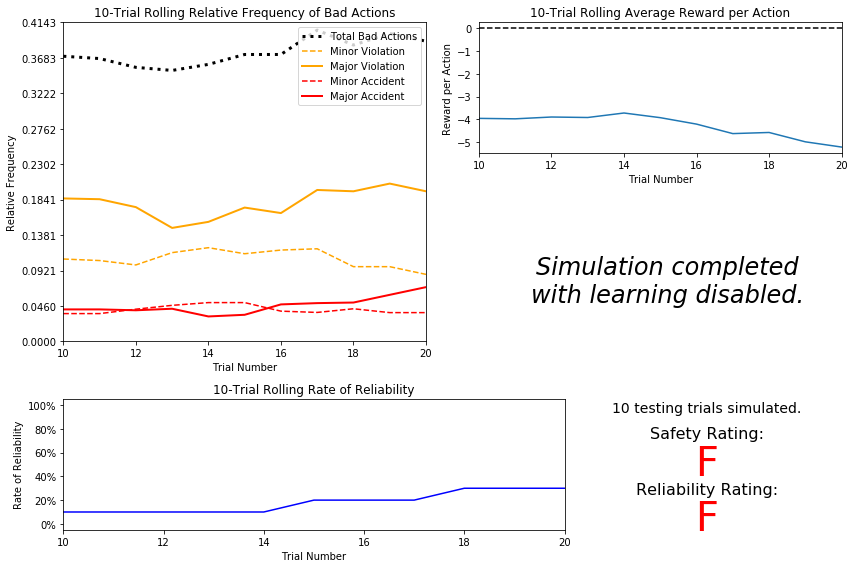

In [13]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### 问题 3
利用上面的从你初始模拟中得到的可视化结果，给出关于驾驶代理程序的分析和若干观察。确保对于可视化结果上的每个面板你至少给出一条观察结果。你可以考虑的一些情况：
- *驾驶代理程序多频繁地做出不良决策？有多少不良决策造成了事故？*
- *假定代理程序是随机驾驶，那么可靠率是否合理？*
- *代理程序对于它的行动会获得什么样的奖励？奖励是否表明了它收到严重的惩罚？*
- *随着试验数增加，结果输出是否有重大变化？*
- *这个智能出租车对于乘客来说，会被人为是安全的且/或可靠的吗？为什么或者为什么不？*

**答案：**

- 驾驶代理程序做出不良决策的相对频率在 0.35 到 0.42 之间。严重事故和轻微事故的相对频率分别在 0.04 至 0.08 之间。
- 随机驾驶的可靠率在 20% 左右，是合理的。因为在每个状态下，出租车只有四种行为选择，所以理论上随机选择正确的概率是 25%。
- 随机代理程序每次行动的平均奖励低于 -4。这个奖励说明它因错误行为受到了严重的惩罚。
- 随着试验数增加，各项输出结果都有变化：事故频率上升，可靠率上升，平均奖励下降。是否有「重大变化」取决于你如何定义「重大」，我倾向于没有重大变化。
- 这辆智能出租车毫无疑问既不安全也不可靠，仅凭随机行为这一点从常识即可做出判断。当然我们从数据上也可以清晰看出，事故率太高，可靠性太低，最重要的，其行为奖励为负值。最终对它的安全性和可靠性的评价都是 F。

-----
## 通知驾驶代理程序
创建一个优化 Q-Learning 的驾驶代理程序的第二步，是定义一系列代理程序会在环境中发生的状态。根据输入、感知数据和驾驶代理程序可用的变量，可以为代理程序定义一系列状态，使它最终可以*学习*在一个状态下它需要执行哪个动作。对于每个状态的「如果这个处于这个状态就那个行动」的状况称为**策略**，就是最终驾驶代理程序要学习的。没有定义状态，驾驶代理程序就不会明白哪个动作是最优的——或者甚至不会明白它要关注哪个环境变量和条件！

### 识别状态
查看 `'build_state()'` 代理程序函数，它显示驾驶代理函数可以从环境中获得下列数据：
- `'waypoint'`，*智能出租车*去向目的地应该行驶的方向，它是*智能出租车*车头方向的相对值。
- `'inputs'`，*智能出租车*的感知器数据。它包括  
  - `'light'`，交通灯颜色。
  - `'left'`，*智能出租车*左侧车辆的目的方向。如果没有车辆，则返回 `None`。
  - `'right'`，*智能出租车*右侧车辆的目的方向。如果没有车辆，则返回 `None`。
  - `'oncoming'`，*智能出租车*交叉方向车辆的目的方向。如果没有车辆，则返回 `None`。
- `'deadline'`，*智能出租车*在时间之内到达目的地还所需的剩余动作数目。

### 问题 4
*代理程序的哪些可用特征与学习**安全性**和**效率**相关性最高？你为什么认为这些特征适合在环境中对**智能出租车**建模？如果你没有选择某些特征，放弃他们的原因是什么？*

**回答：**以上全部 6 项特征中，除了 `'deadline'` 外都与学习安全性和效率有关，因为每一项特征都对出租车在当前状态下可以采用的动作有影响。我会选择前 5 项特征进行建模。

不选择 `deadline` 的特征的原因主要有两个：

1. `deadline` 平均取值在 20～30 左右，会极大地增加特征空间，导致在合理的训练次数内无法有效学习
2. 本项目中，每次出租车的起点和终点都在变化，而 `deadline` 实际上无法表达这种变化，因为它只与起点和终点之间的距离有关，与实际位置无关。因此该特征没有范化能力和实际意义。

### 定义状态空间
当定义一系列代理程序会处于的状态，必需考虑状态空间的*大小*。就是说，如果你期望驾驶代理程序针对每个状态都学习一个**策略**，你会需要对于每一个代理状态都有一个最优的动作。如果所有可能状态的数量非常大，最后会变成这样的状况，驾驶代理程序对于某些状态学不到如何行动，会导致未学习过的决策。例如，考虑用下面的特征定义*智能出租车*的状态的情况：

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')` 
发生如 `(False, True, True, True, False, False, '3AM')` 的状态的频次如何？没有近乎无限数量的训练，很怀疑代理程序会学到一个合适的动作！

### 问题 5
*如果用你在**问题 4** 中选择的特征来定义一个状态，状态空间的大小是多少？假定你了解环境以及它是如何模拟的，你觉得经过合理数量的训练之后，代理驾驶能学到一个较好的策略吗？（遇见绝大部分状态都能作出正确决策。）*
**提示：** 考虑特征*组合*来计算状态的总数！

**回答：**在问题 4 中我选择了 5 项特征，其状态空间大小是每个特征可能的取值数量的乘积：
- `waypoint`：3
- `light`：2
- `left`：4
- `right`：4
- `oncoming`：4

$3 \times 2 \times 4 \times 4 \times 4 =  384$。这个空间不是很大，虽然暂时知识储备无法计算出需要多少次可以有效覆盖，但是凭直觉经过合理数量的训练后，代理驾驶应该能够学到一个较好的策略。

### 更新驾驶代理程序的状态
要完成你的第二个实现，去到 `'build_state()'` 代理程序函数。根据你在**问题 4** 给出的判断，你现在要将 `'state'` 变量设定为包含所有 Q-Learning 所需特征的元组。确认你的驾驶代理程序通过运行代理程序文件和模拟会更新它的状态，注意状态是否显示了。如果用了可视化模拟，确认更新的状态和在模拟程序里看到的一致。

**注意：**观察时记住重置模拟程序的标志到默认设定！

-----
## 实现 Q-Learning 驾驶代理程序
创建一个优化 Q-Learning 的驾驶代理程序的第三步，是开始实现 Q-Learning 自身的功能。Q-Learning 的概念相当直接：每个访问的状态，为所有可用的状态-行动配对在 Q-table 里创建一条记录。然后，当代理程序遇到一个状态并执行了一个动作，基于获得的奖励和设定的相互的更新规则，来更新关联的状态-动作配对的 Q-value。当然，Q-Learning 还带来其他的收益，如此我们可以让代理程序根据每个可能的状态-动作配对的 Q-values，来为每个状态选择*最佳*动作。在这个项目里，你会实现一个*衰减* $\epsilon$ *-贪心* 的 Q-learning 算法，不含折扣因子。遵从每个代理程序函数的 **TODO** 下的实现指导。

注意代理程序的属性 `self.Q` 是一个字典：这就是 Q-table 的构成。每个状态是 `self.Q` 字典的键，每个值是另一个字典，包含了 *action* 和 *Q-value*。这里是个样例：

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

此外，注意你要求利用一个*衰减* $\epsilon$*（探索）因子*。因此，随着试验的增加，$\epsilon$ 会向 0 减小。这是因为，代理程序会从它的行为中学习，然后根据习得的行为行动。而且当 $\epsilon$ 达到特定阈值后（默认阈值为 0.01），代理程序被以它所学到的东西来作检测。作为初始的 Q-Learning 实现，你将实现一个线性衰减 $\epsilon$ 的函数。

### Q-Learning 模拟结果
要从最初的 Q-learning 程序获得结果，你需要调整下面的标志和设置：
- `'enforce_deadline'` - 将此标志设定为 `True` 来强制驾驶代理程序捕获它是否在合理时间内到达目的地。
- `'update_delay'` - 将此标志设定为较小数值（比如 `0.01`）来减少每次试验中每步之间的时间。
- `'log_metrics'` - 将此标志设定为 `True` 将模拟结果记录为在 `/logs/` 目录下的 `.csv` 文件，Q-table 存为 `.txt` 文件。
- `'n_test'` - 将此标志设定为 `'10'` 则执行 10 次测试试验。
- `'learning'` - 将此标志设定为 `'True'` 来告诉驾驶代理使用你的 Q-Learning 实现。

此外，使用下面的 $\epsilon$ 衰减函数：

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

如果你在实施时遇到困难，尝试把 `'verbose'` 标志设为 `True` 来调试。调试时，在这里设定的标志会返回到它们的默认设定。重要的是你要理解每个标志做什么并且解释它们怎么影响模拟！

当你成功完成初始的 Q-Learning 模拟程序后，运行下面代码单元格来使结果可视化。注意当相同的模拟运行时，log 文件会被覆写，所以要留意载入的 log 文件！

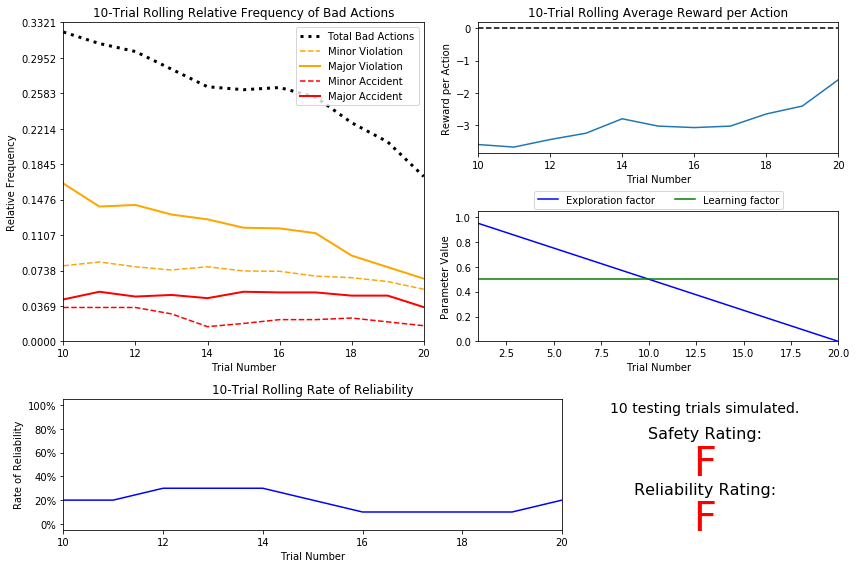

In [14]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### 问题 6
利用上面的从你默认的 Q-Learning 模拟中得到的可视化结果，像在**问题 3** 那样，给出关于驾驶代理程序的分析和若干观察。注意模拟程序应该也产生了 Q-table 存在一个文本文件中，可以帮到你观察代理程序的算法。你可以考虑的一些情况：
- *有没有观察到基本驾驶代理程序和默认的 Q-Learning 代理程序的相似之处？*
- *在测试之前驾驶代理大约需要做多少训练试验？在给定的 $\epsilon$ 容忍度下，这个数字是否合理？*
- *你实现的 $\epsilon$（探索因子）衰减函数是否准确地在参数面板中显示？*
- *随着试验数增加，不良动作的数目是否减少?平均奖励是否增加？*
- *与初始的驾驶代理程序相比，安全性和可靠性评分怎样？*

**回答：**

- 默认 Q-Learning 程序的结果与基本驾驶代理程序对比，不良动作频率和平均奖励的初始情况一致；不过随着训练增加，Q-Learning 的表现有明显改善；可靠性方面二者表现一致，都无法保证抵达目的地。
- 在测试前驾驶代理做了 20 次训练。给定的 $\epsilon$ 初始值是 1，每次递减 0.05，20 次训练后 $\epsilon$ 刚好到达阈值，因此是合理的。
- 我实现的 $\epsilon$ 衰减函数准确地显示在参数面板中。
- 随着试验数增加，不良动作的数目有减少，平均奖励有增加。
- 与初始的驾驶代理程序相比，安全性和可靠性评分没有改善。

-----
## 改进 Q-Learning 驾驶代理程序
创建一个优化 Q-Learning 的驾驶代理程序的第三步，是执行优化！现在 Q-Learning 算法已经实现并且驾驶代理程序已经成功学习了，需要调整设定、调节参数让驾驶代理程序学习**安全性**和**效率**。通常这一步需要很多试验和错误，因为某些设定必定会造成更糟糕的学习。要记住的一件事是学习的行为本身和需要的时间：理论上，我们可以允许代理程序用非常非常长的时间来学习；然而，Q-Learning 另一个目的是*将没有习得行为的试验试验变为有习得行为的行动*。例如，训练中总让代理程序执行随机动作（如果 $\epsilon = 1$ 并且永不衰减）当然可以使它*学习*，但是不会让它*行动*。当改进你的 Q-Learning 实现时，要考虑做一个特定的调整的意义，以及它是否逻辑上是否合理。

### 改进 Q-Learning 的模拟结果
要从最初的 Q-learning 程序获得结果，你需要调整下面的标志和设置：
- `'enforce_deadline'` - 将此标志设定为 `True` 来强制驾驶代理程序捕获它是否在合理时间内到达目的地。
- `'update_delay'` - 将此标志设定为较小数值（比如 `0.01`）来减少每次试验中每步之间的时间。
- `'log_metrics'` - 将此标志设定为 `True` 将模拟结果记录为在 `/logs/` 目录下的 `.csv` 文件，Q-table 存为 `.txt` 文件。
- `'learning'` - 将此标志设定为 `'True'` 来告诉驾驶代理使用你的 Q-Learning 实现。
- `'optimized'` - 将此标志设定为 `'True'` 来告诉驾驶代理你在执行一个优化版本的 Q-Learning 实现。

优化 Q-Learning 代理程序可以调整的额外的标志：
- `'n_test'` - 将此标志设定为某个正数（之前是 10）来执行那么多次测试试验。
- `'alpha'` - 将此标志设定为 0 - 1 之间的实数来调整 Q-Learning 算法的学习率。
- `'epsilon'` - 将此标志设定为 0 - 1 之间的实数来调整 Q-Learning 算法的起始探索因子。
- `'tolerance'` - 将此标志设定为某个较小的大于0的值（默认是 0.05）来设定测试的 $\epsilon$ 阈值。

此外，使用一个你选择的 $\epsilon$ (探索因子)衰减函数。注意无论你用哪个函数，**一定要以合理的速率衰减**到 `'tolerance'`。Q-Learning 代理程序到此才可以开始测试。某个衰减函数的例子（$t$ 是试验的数目）：

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$

如果你想的话，你也可以使用 $\alpha$（学习率）的衰减函数，当然这通常比较少见。如果你这么做了，确保它满足不等式 $0 \leq \alpha \leq 1$。
如果你在实施时遇到困难，尝试把 `'verbose'` 标志设为 `True` 来调试。调试时，在这里设定的标志会返回到它们的默认设定。重要的是你要理解每个标志做什么并且解释它们怎么影响模拟！

当你成功完成初始的 Q-Learning 模拟程序后，运行下面代码单元格来使结果可视化，请注意为了达到项目要求你需要在安全性和可靠性上获得至少都为 A 的评分。注意当相同的模拟运行时，log 文件会被覆写，所以要留意载入的 log 文件！

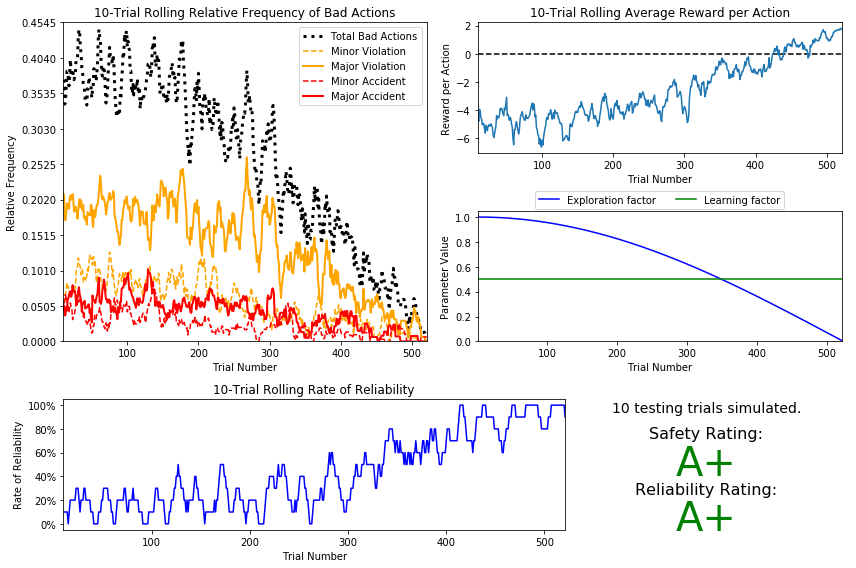

In [15]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### 问题 7
利用上面的从你改进的 Q-Learning 模拟中得到的可视化结果，像在**问题 6** 那样，给出关于改进的驾驶代理程序的最终分析和观察。你需要回答的问题：
- *使用了什么 $\epsilon$（探索因子）的衰减函数？*
- *在测试之前驾驶代理大约需要做多少训练试验？*
- *你用了什么 epsilon-tolerance 和 alpha（学习率）值？为什么？*
- *与之前的默认 Q-Learning 学习器相比，这个 Q-Learning 学习器有多少改进？ *
- *你会说 Q-Learning 学习器的结果表明了你的驾驶代理程序成功地学习了一个合适的策略吗？*
- *你对*智能出租车*的安全性和可靠性评分满意吗？*

**回答：**
- 衰减函数为 $\epsilon = cos(t * \alpha * 0.006)$。利用 $cos$ 在 $[1, 0]$ 之间是凸函数的特性，使得 $\epsilon$ 在初期衰减得慢，更多「探索」，末期衰减得快，更多「执行」。训练次数目标是达到 500 次左右，根据三角函数公式计算得出系数为 0.006。
- 大约做了 521 次试验。
- `'epsilon-tolerance'` 为 0.01，`'alpha'` 为 0.5。Epsilon-tolerance 取了一个较小值，主要是为了增加训练次数。由公式 $Q(s,a) = (1-\alpha) \times Q(s,a) + \alpha \times r$ 可知，alpha 的取值影响学习过程中已获得的奖励和新奖励的权重。Alpha 越趋于 0，每次奖励的对 Q 的影响越趋于 0（不学习）；alpha 越趋于 1，Q 越趋于“忘记以前的学习成果”，完全由最新一次学习奖励确定。因此中间值 0.5 是一个合理的选择。
- 与默认的 Q-Learning 学习器相比，这个 Q-Learning 学习期有很大的改进。随着训练次数的增加，其不良动作率可以降低到接近 0 的水平，可靠性超过 80%，平均得分接近 2，最终性能评分可以达到双 A+ 水平。
- 从结果表现看，可以说这个 Q-Learning 学习器成功地学习了一个合适的策略。
- 我对这一次学习的结果是满意的。但在测试中也发现，学习结果并不稳定，每次测试的结果不能保证都是双 A 水平，有时安全性会很低。猜测导致这一情况的原因是训练时学习的状态不能覆盖整个状态空间，如果增加学习次数，或采取某种策略使得训练尽可能覆盖状态空间，则应该会改善。

### 定义一个最优策略

有时，对于重要的问题*“我要让我的代理程序学习什么？”*的答案，只是理论性的，无法具体描述。然而这里，你可以具体定义代理程序要学什么，就是美国通行权交通法案。这些法律是已知信息，你可以基于这些法律，为*智能出租车*进一步定义每一个状态所做的最优动作。在那种情况下，我们称这一系列最优状态-动作配对为**最优策略**。因此，不像那些理论性的回答，不仅通过收到的奖励（惩罚），而且纯观察，代理程序是否在“错误”地行动能很清晰地得知。如果代理程序闯了红灯，我们既看见它获得了一个负面奖励，也知道这是一个错误的行为。这可以用来帮你验证驾驶代理程序习得的**策略**是否正确，或只是个**次优策略**。

### 问题 8
给出几个关于最优策略是什么样子的例子（用你已定义的状态）。之后，查看 `'sim_improved-learning.txt'` 文本文件，看你的改进的 Q-Learning 算法的结果。_每个从模拟中纪录的状态，对于给定的状态，**策略**（得分最高的动作）是否正确？是否对于有些状态，有策略不同于预期的最优策略？_给出一个状态和记录的状态-动作的奖励，解释为什么这是个正确的策略。

**回答：**

我选择的状态组合是 `(waypoint, light, left, right, oncoming)`。选择最优策略的原则是：

1. 若遇到红灯，则应停止；若遇到绿灯，则应选择一个方向前进，不能停止；
2. 在前进时，首先选择驶向目的地的方向（`waypoint`）；
3. 若在 `waypoint` 方向上可能发生事故（与其他方向车辆有冲突），则选择其他安全方向前进。

例如：
1. 状态为 `('right', 'green', 'left', 'left', None)` 时，最优策略为 `right`；
2. 状态为 `('left', 'green', 'forward', 'left', None)` 时，最优策略为 `left`；
3. 状态为 `('forward', 'green', None, 'right', None)` 时，最优策略为 `left`；
4. 状态为 `('forward', 'red', 'right', 'forward', 'left')` 时，最优策略为 `None`。

`sim_improved-learning.txt` 文件中大部分策略都是正确的；

存在个别状态的最优策略不同于预期。如记录  
`('forward', 'green', 'right', 'left', 'left')`  
 -- forward : 0.00  
 -- None : 0.00  
 -- right : -0.00  
 -- left : 1.03  
预期最优策略 `forward`，实际最优策略是 `left`。注意到该状态下 `forward` 策略得分是 0.00，因此猜测原因是训练中没有学习到该策略。

对于记录  
`('right', 'green', 'left', 'left', None)  
 -- forward : 0.04  
 -- None : -4.34  
 -- right : 2.36  
 -- left : 0.43`  
 此时交通灯是 `green`，`oncoming` 是 `None`，即没有对向来车，根据规则出租车可以选择任意方向行驶，但不能停止。所以该状态下的策略中，`None` 是负分，其他三个动作都是正分。同时 `waypoint` 是 `right`，即为了抵达目的地，预期出租车向右行驶，所以策略 `right` 是最优策略。

-----
### 选做：未来奖励 - 折扣因子 `'gamma'`
也许你会好奇，作为 Q-Learning 算法的一部分，之前要求你在实现中**不要**使用折扣引子 `'gamma'`。在算法中包含未来奖励能有助于在未来状态回溯到当前状态时的反向正面奖励。本质上，如果给予驾驶代理程序执行若干动作到达不同状态的选择，包含未来奖励会是代理程序偏向可以得到更多奖励的状态。一个例子是驶向目的的驾驶代理程序：所有行动和奖励都相等，那么理论上如果到达目的地会有额外奖励，驶向目的会获得更好的奖励。然而，即使在这个项目里，驾驶代理程序也要在规定的时间里到达目的地，包含未来奖励不会有益于代理程序。实际上，如果代理程序给予多次试验学习，它甚至会给 Q-value 带来负面影响！

### 可选问题 9
*在项目中有两个特点使得未来奖励在这个 Q-Learning 算法无效。一个特点是关于*智能出租车*本身，另一个是关于环境。你能指出它们是什么以及为什么未来奖励不会在这个项目中起效？*

**回答：**

> **注意：**当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出 **File -> Download as -> HTML (.html)**。把这个 HTML 和这个 iPython notebook 一起做为你的作业提交。